<a href="https://colab.research.google.com/github/SahaRahul/Call-For-Code-2020/blob/master/ImageColorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (157, 236, 3)


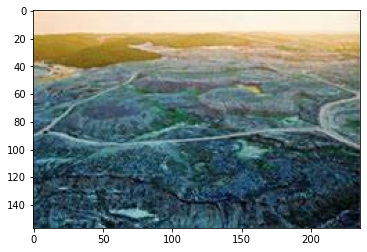

In [12]:

image = cv2.imread('images01_N.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

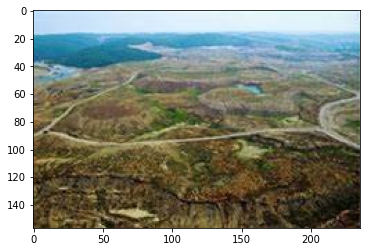

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [14]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [15]:

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [16]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([116.24195289, 112.21040236,  84.79245584]),
 array([124.52454608, 160.28961247, 171.86498093]),
 array([70.55948655, 59.21604901, 31.89648159]),
 array([209.52243116, 234.00390873, 249.72089584])]

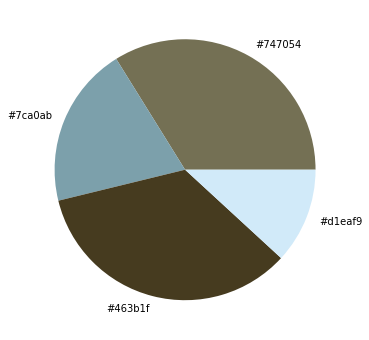

In [17]:
get_colors(get_image('images01_N.jpg'), 4, True)

[array([113.30128141, 135.07042813,  98.52982517]),
 array([60.2690151 , 85.4420499 , 52.74471843]),
 array([ 76.19245029, 107.38784065,  75.79055873]),
 array([174.10748359, 175.66905908, 149.65803063])]

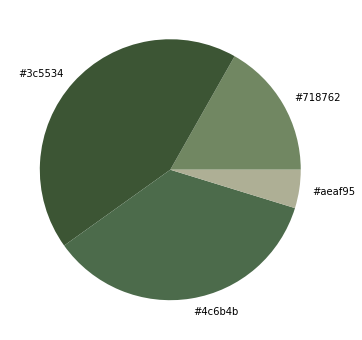

In [18]:
get_colors(get_image('images01_Y.jpg'), 4, True)

[array([171.63297734, 208.02841515,  21.70274635]),
 array([232.75465291, 241.3592521 , 203.14240275]),
 array([ 87.29723812, 144.80436958,  14.17775484]),
 array([189.56260766, 216.19307276,  98.72801657])]

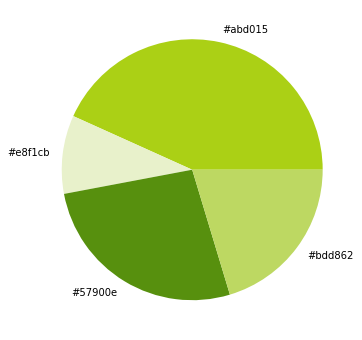

In [19]:
get_colors(get_image('green.jpg'), 4, True)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


[array([  0., 133.,  66.])]

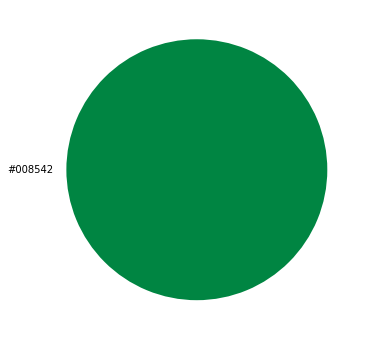

In [20]:
get_colors(get_image('pure_green.png'), 4, True)